# Program to detect plates in image

10
*****************
Found plate: [ True]
*****************



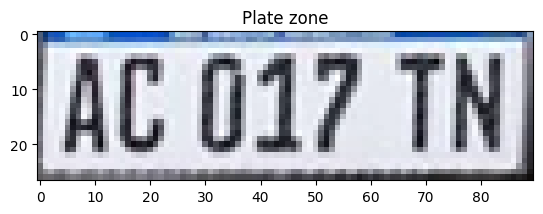

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


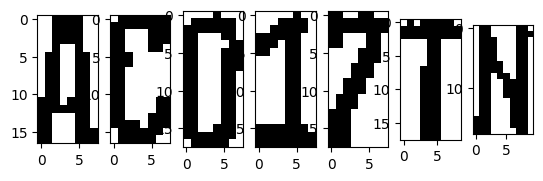

Recognizable characters: 7
11
*****************
Found plate: [ True]
*****************



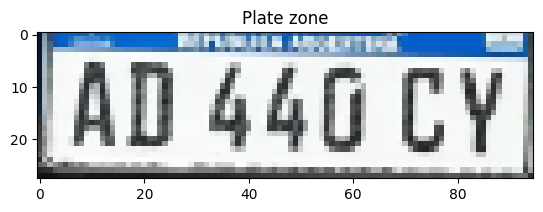

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


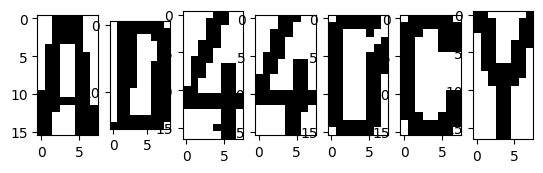

Recognizable characters: 7
12
*****************
Found plate: [ True]
*****************



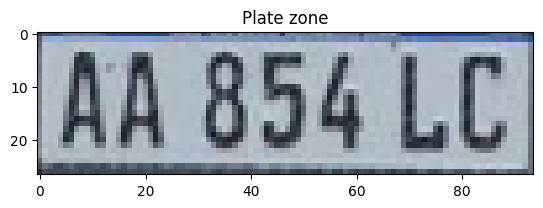

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


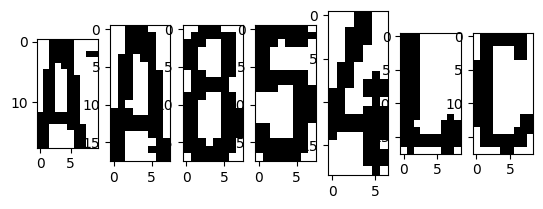

Recognizable characters: 7
13
*****************
Found plate: [ True]
*****************



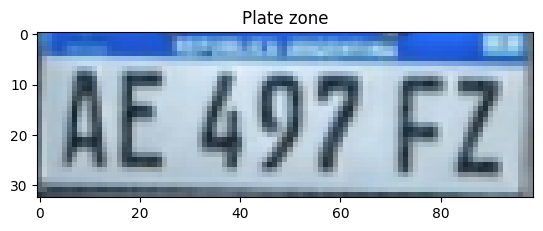

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


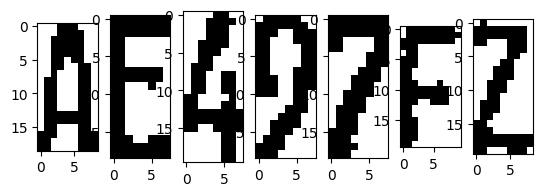

Recognizable characters: 7
14
*****************
Found plate: [ True]
*****************



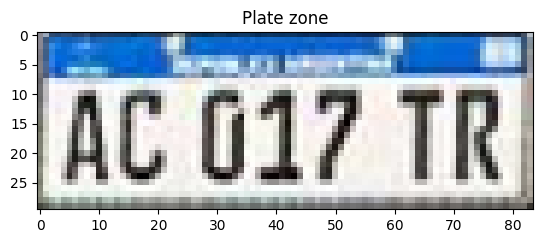

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


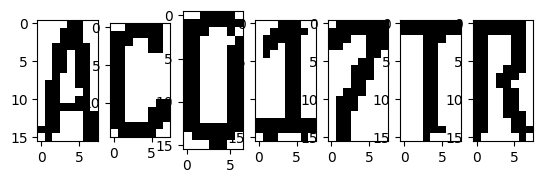

Recognizable characters: 7
15
*****************
Found plate: [ True]
*****************



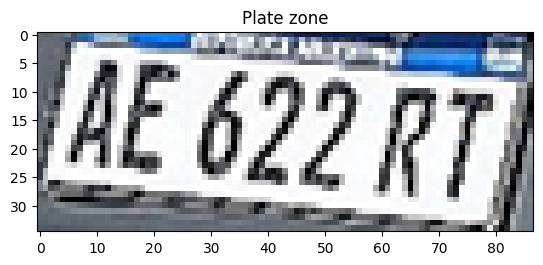

Number of characters in plate before filter: 4
Number of characters in plate after filter: 4


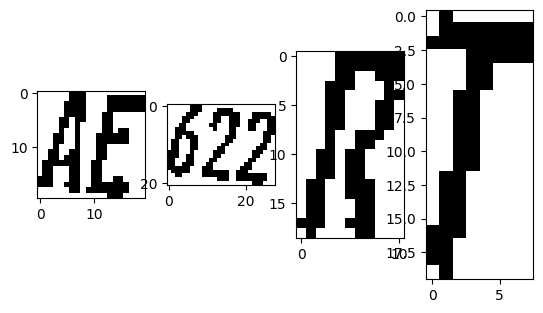

Recognizable characters: 4
16
*****************
Found plate: [ True]
*****************



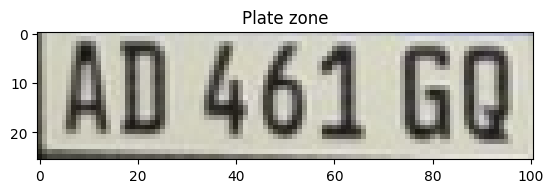

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


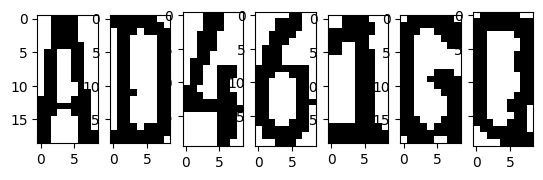

Recognizable characters: 7
17
*****************
Found plate: [ True]
*****************



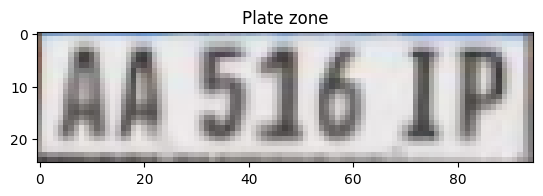

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


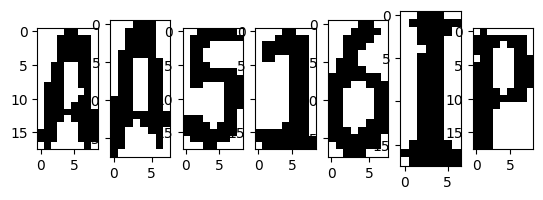

Recognizable characters: 7
18
*****************
Found plate: [ True]
*****************



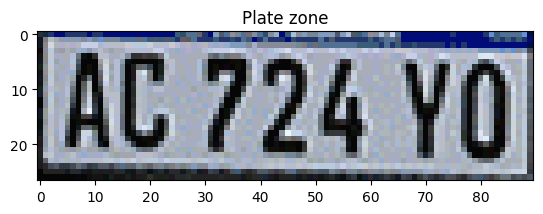

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


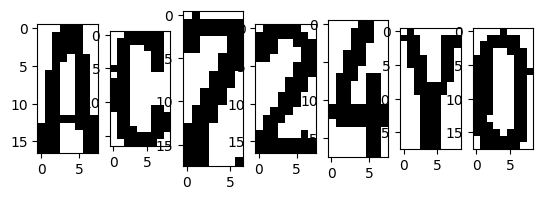

Recognizable characters: 7
19
*****************
Found plate: [ True]
*****************



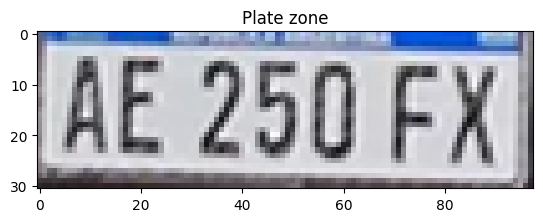

Number of characters in plate before filter: 8
Number of characters in plate after filter: 7


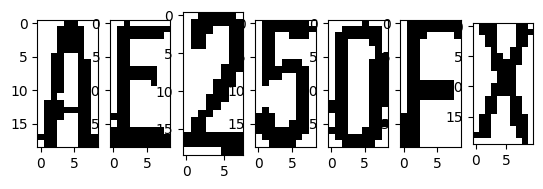

Recognizable characters: 7
20
*****************
Found plate: [ True]
*****************



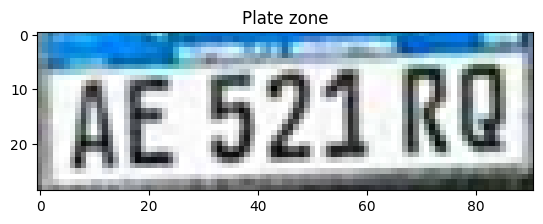

Number of characters in plate before filter: 5
Number of characters in plate after filter: 5


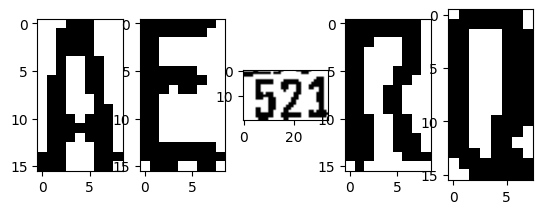

Recognizable characters: 5
21
*****************
Found plate: [ True]
*****************



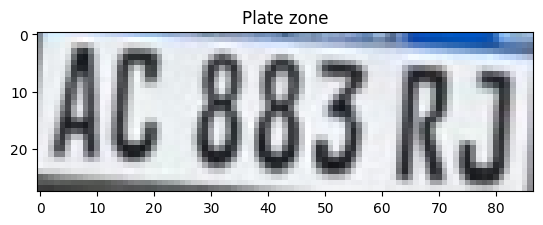

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


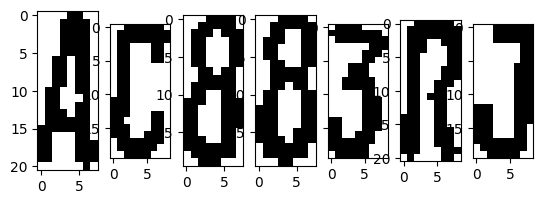

Recognizable characters: 7
22
*****************
Found plate: [ True]
*****************



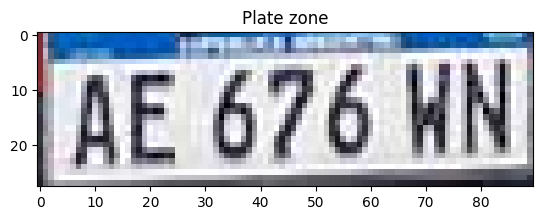

Number of characters in plate before filter: 6
Number of characters in plate after filter: 6


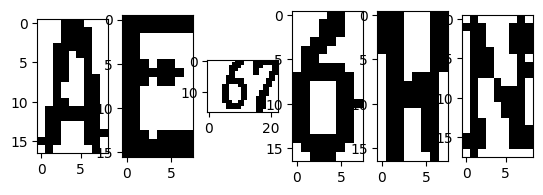

Recognizable characters: 6
23
*****************
Found plate: [ True]
*****************



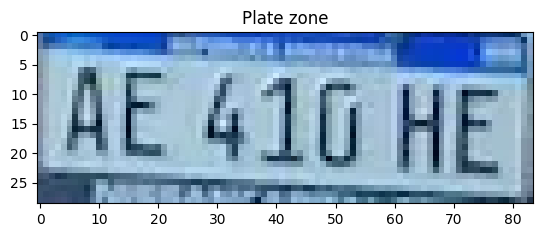

Number of characters in plate before filter: 7
Number of characters in plate after filter: 7


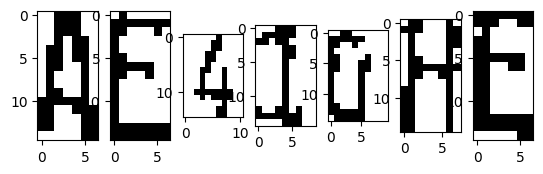

Recognizable characters: 7
24
*****************
Found plate: [ True]
*****************



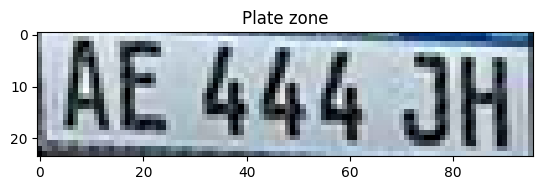

Number of characters in plate before filter: 8
Number of characters in plate after filter: 7


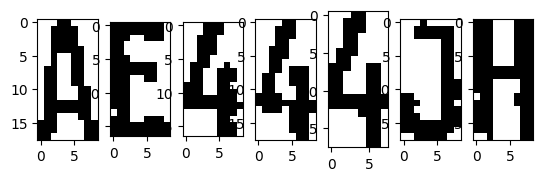

Recognizable characters: 7
25
*****************
Found plate: [ True]
*****************



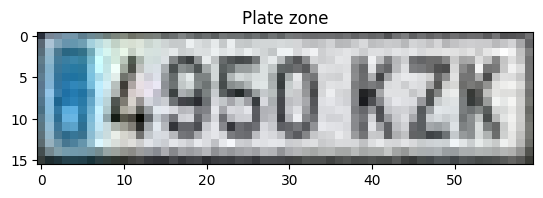

Number of characters in plate before filter: 8
Number of characters in plate after filter: 8


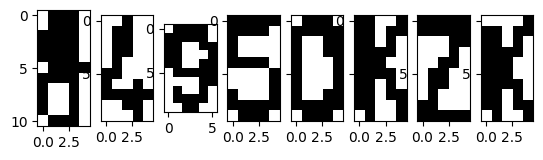

Recognizable characters: 8
26
*****************
Found plate: [ True]
*****************



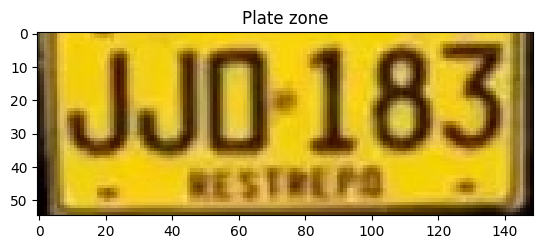

Number of characters in plate before filter: 6
Number of characters in plate after filter: 6


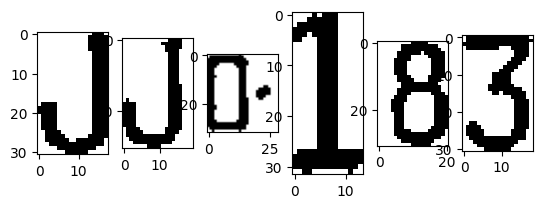

Recognizable characters: 6
27
*****************
Found plate: [ True]
*****************



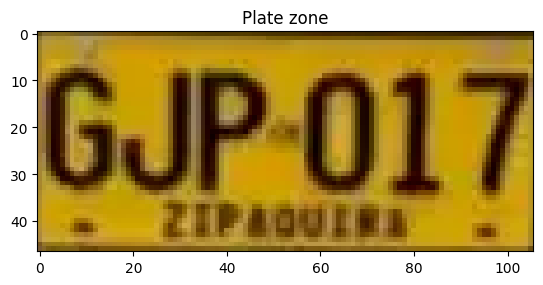

Number of characters in plate before filter: 6
Number of characters in plate after filter: 6


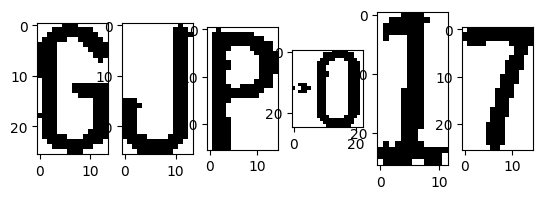

Recognizable characters: 6
28
*****************
Found plate: [ True]
*****************



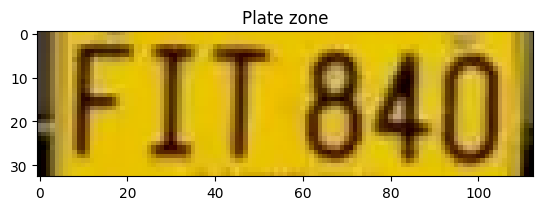

Number of characters in plate before filter: 6
Number of characters in plate after filter: 6


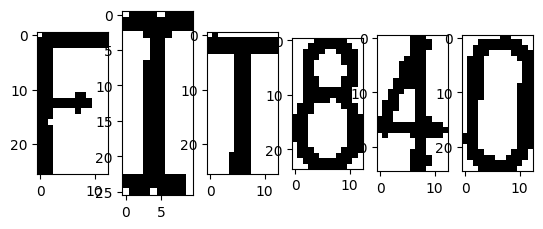

Recognizable characters: 6
29
*****************
Found plate: [ True]
*****************



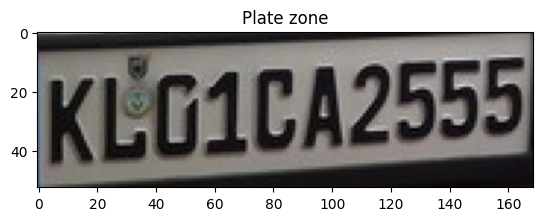

Number of characters in plate before filter: 10
Number of characters in plate after filter: 10


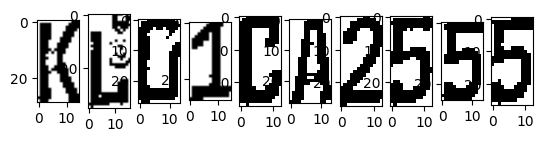

Recognizable characters: 10


In [57]:
import cv2
import matplotlib.pyplot as plt
from plate_detector import detect_plate
import numpy as np
import skimage
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

index = "002"
for num in range(10, 30):
    print(num)
    img = cv2.imread(f'Fig/{num:03}.png', cv2.IMREAD_COLOR)

    b, plate, m = detect_plate(img)
    print(f"*****************\nFound plate: {b}\n*****************\n")
    #print(m)
    
    plt.title("Plate zone")
    plt.imshow(cv2.cvtColor(plate, cv2.COLOR_BGR2RGB))
    plt.show()

    plate_gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)

    thres = cv2.adaptiveThreshold(plate_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 7, 13)
    clear_border = skimage.segmentation.clear_border(thres)


    inverted = cv2.bitwise_not(clear_border)


    # Get totally white columns
    black = 0
    selected_columns = []
    for column in range(inverted.shape[1]):
        if black in inverted[:, column]: continue
        selected_columns.append(column)


    limit_columns = []
    # Get limit white columns
    for i in range(len(selected_columns)-1):
        if selected_columns[i+1] - selected_columns[i] == 1: continue
        limit_columns.append(selected_columns[i])
        limit_columns.append(selected_columns[i+1])

    #print(limit_columns)
    if len(limit_columns) % 2 == 0: 
        print(f"Number of characters in plate before filter: {len(limit_columns) // 2}")
    else:
        print("Not coherent number of characters found")

    plate_chars = []

    for i in range(0, len(limit_columns), 2):
        char = inverted[:, limit_columns[i]+1:limit_columns[i+1]]
        # Delete fake chars by width
        if char.shape[1] < 4: continue
        plate_chars.append(inverted[:, limit_columns[i]+1:limit_columns[i+1]])        

    print(f"Number of characters in plate after filter: {len(plate_chars)}")

    # Clean chars horizontally
    # Get totally white rows
    black = 0

    clean_plate_chars = []
    for plate_char in plate_chars:
        selected_rows = []
        for row in range(plate_char.shape[0]):
            if black in plate_char[row, :]: continue
            selected_rows.append(row)
        # plt.title(f"Char")
        # plt.imshow(cv2.cvtColor(plate_char, cv2.COLOR_BGR2RGB))
        # plt.show()
        #print(f"rows to clean: {selected_rows}")
        limit_rows = []
        # Get limit white rows
        for i in range(len(selected_rows)-1):
            if selected_rows[i+1] - selected_rows[i] == 1: continue
            limit_rows.append(selected_rows[i])
            limit_rows.append(selected_rows[i+1])
        #print(f"Limit rows: {limit_rows}")

        index_to_delete = []
        for i in range(0, len(limit_rows), 2):
            if limit_rows[i+1] - limit_rows[i] < 6:
                index_to_delete.append(i)
                index_to_delete.append(i+1)
        #print(index_to_delete)
        for i, index in enumerate(index_to_delete): limit_rows.pop(index - i)

        if len(limit_rows):
            plate_char = plate_char[limit_rows[0]+1: limit_rows[1], :]
            # plt.title(f"Char after row filter")
            # plt.imshow(cv2.cvtColor(plate_char, cv2.COLOR_BGR2RGB))
            # plt.show()
        else:
            print("Not a character")
        clean_plate_chars.append(plate_char)

    # # Filter characters again
    # # Get totally white columns
    # clean_plate_chars2 = []
    # black = 0
    # for plate_char in clean_plate_chars:
    #     selected_columns = []
    #     for column in range(plate_char.shape[1]):
    #         if black in plate_char[:, column]: continue
    #         selected_columns.append(column)
    #     #print(f"selected columns to change: {selected_columns}")
    #     if len(selected_columns):
    #         limit_columns = []
    #         # Get limit white columns
    #         for i in range(len(selected_columns)-1):
    #             if selected_columns[i+1] - selected_columns[i] == 1: continue
    #             limit_columns.append(selected_columns[i])
    #             limit_columns.append(selected_columns[i+1])
    #         print(f"here: {limit_columns}")
    #         for i in range(0, len(limit_columns), 2):
    #             if limit_columns[i+1] - limit_columns[i] < 6:
    #                 index_to_delete.append(i)
    #                 index_to_delete.append(i+1)
    #     #print(index_to_delete)
    #         for i, index in enumerate(index_to_delete): limit_columns.pop(index - i)
    #         if len(limit_columns):
    #             plate_char = plate_char[:, limit_columns[0]+1: limit_columns[1]]
    #         # plt.title(f"Char to change")
    #         # plt.imshow(cv2.cvtColor(plate_char, cv2.COLOR_BGR2RGB))
    #         # plt.show()
    #         if selected_columns[0] == 0:
    #             plate_char = plate_char[:, selected_columns[-1]+1:]
    #         else:
    #             plate_char = plate_char[:, :selected_columns[0]]
    #         # plt.title(f"Char changed")
    #         # plt.imshow(cv2.cvtColor(plate_char, cv2.COLOR_BGR2RGB))
    #         # plt.show()
    #     if plate_char.shape[1]:
    #             clean_plate_chars2.append(plate_char)

    fig, ax = plt.subplots(1, len(clean_plate_chars))
    for i, pl in enumerate(clean_plate_chars):
        ax[i].imshow(cv2.cvtColor(pl, cv2.COLOR_BGR2RGB))
        # plt.title(f"Clean char 2 final final")
        # plt.imshow(cv2.cvtColor(pl, cv2.COLOR_BGR2RGB))
        # plt.show()
    plt.show()
    print(f"Recognizable characters: {len(clean_plate_chars)}")